In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Line graphs

## Single graph with multiple lines from Tensor board

In [14]:
def plot_scatters(keys, labels, save_key, exp_nums, ylabel="Validation accuracy"):
    root_path = "../.."
    file_pathes = [f"{root_path}/load/board_csv/run-{key}-tag-val_epoch_acc.csv" for key in keys]
    dfs = [pd.read_csv(file_path) for file_path in file_pathes]
    
    for df, label, exp_num in zip(dfs, labels, exp_nums):
        x = df["Step"]
        y = df["Value"].values
        plt.plot(x, y, label=exp_num+": "+label)
        print(f"{label}:  Last {np.round(y[-1], 2)}, Max {np.round(max(y), 4)}")
        
    plt.xticks(np.arange(1, 6, 1))
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.savefig(f"{root_path}/output/images/{save_key}_acc.png", bbox_inches="tight")
    plt.show()

0.00005:  Last 0.94, Max 0.9445
0.0001:  Last 0.95, Max 0.9473
0.0002:  Last 0.95, Max 0.9474
0.0003:  Last 0.94, Max 0.9448
0.0005:  Last 0.94, Max 0.9409


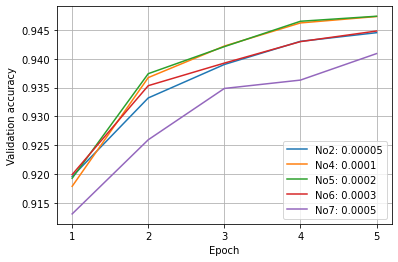

In [15]:
# Diff size models
keys = ['small_base_exp01_bin_01','small_base_lr_exp01_01','small_base_lr_exp03_01','small_base_lr_exp04_01','small_base_lr_exp02_01']
labels = ['0.00005','0.0001','0.0002','0.0003','0.0005']
file_name = "Diff_learning_rate"
exp_nums = ["No2", "No4", "No5", "No6", "No7"]
plot_scatters(keys, labels, file_name, exp_nums)

# PyChart

## Single PyChart from csv

In [12]:
df = pd.read_csv("../../load/csv/INM701_pichart.csv")
df.head(2)

,labels
0,functional
1,functional


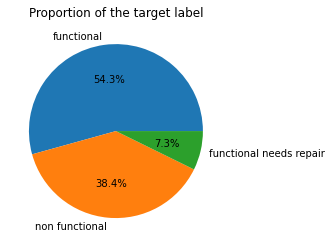

In [13]:
cnt_label = df["labels"].value_counts()
plt.pie(cnt_label.values, labels=cnt_label.index, autopct="%1.1f%%")
plt.title("Proportion of the target label")
plt.show()

# Boxplot

## Count outliers

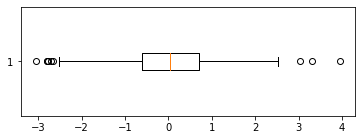

The number of bottom outliers is 6, the top outliers is 3


In [25]:
np.random.seed(1)
x = np.random.randn(1000)
plt.figure(figsize=(6, 2))
bp = plt.boxplot(x, vert=False)
plt.show()

whisker_under = bp["whiskers"][0].get_xdata()[1]
whisker_top =  bp["whiskers"][1].get_xdata()[1]

num_outlier_bottom = len(x[whisker_under > x])
num_outlier_top = len(x[whisker_top < x])
print(f"The number of bottom outliers is {num_outlier_bottom}, the top outliers is {num_outlier_top}")

# Histogram

## Multiple histogram from csv file

In [33]:
df = pd.read_csv(f"../../load/csv/token_count.csv")
df.head(2)

,labels,cnt
0,1,133
1,4,98


In [28]:
def plot_histograms(x_list, x_labels):
    fig = plt.figure(figsize=(14,3.5))
    plt.subplots_adjust(wspace=0.4, hspace=0.2)
    num_plot = len(x_labels)
    for i in range(num_plot):
        ax = fig.add_subplot(1, num_plot, i+1)
        ax.hist(x_list[i], bins=100, label=f"Start {i}", alpha=1)
        ax.set_xlabel(x_labels[i], fontsize=12)
        ax.set_yticks(range(0, 16000, 2000))    
        ax.set_xticks(range(0, 1000, 200))
    plt.show()

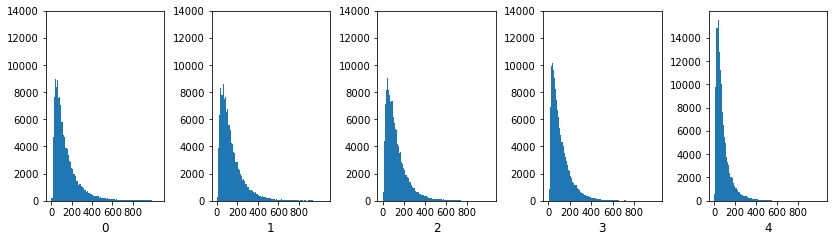

In [30]:
x_list = [df.loc[df["labels"]==i, "cnt"].values for i in [0, 1, 2, 3, 4]]
x_labels = [0, 1, 2, 3, 4]
plot_histograms(x_list, x_labels)

# Pair plot

## Multiple pair-plots from csv file

In [2]:
def plot_pair_heatmap(df, cols, root_path, save_key):
    fig = plt.figure(figsize=(14,3.5))
    plt.subplots_adjust(wspace=0.25, hspace=0.2)
    num_feat = len(cols)
    for i in range(num_feat): # row
        for j in range(num_feat): # col
            if i == j: # diagnal
                pass
            else:
                if i >= j:
                    col_x = cols[j]
                    col_y = cols[i]
                    ax = fig.add_subplot(1, num_feat, i+j)
                    points = ax.scatter(df[col_x], df[col_y], c=df[color_col], 
                            alpha=0.7, s=75, cmap="Blues")
                    fig.colorbar(points)
                    ax.set_xlabel(col_x, fontsize=12)
                    ax.set_ylabel(col_y, fontsize=12)
    plt.savefig(f"{root_path}/output/images/{save_key}.png", bbox_inches="tight")
    plt.show()

In [3]:
df = pd.read_csv(f"../../load/csv/INM701_bayesian_opt.csv")
df.head()

,test score,n_estimators,max_features,max_depth
0,0.795398,59,168,40
1,0.752862,564,170,10
2,0.800449,684,34,41
3,0.799383,576,117,98
4,0.800898,293,87,66


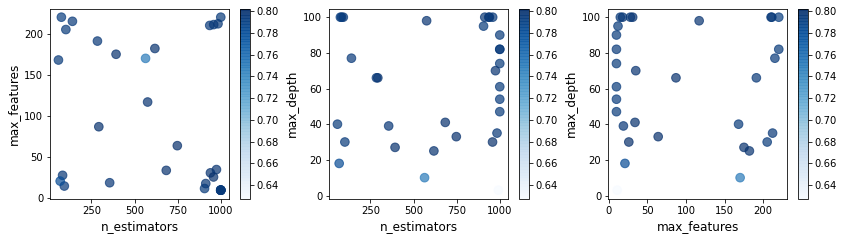

In [4]:
cols = ["n_estimators", "max_features", "max_depth"]
color_col = "test score"
root_path = "../.."
save_key = "INM701_bayesian_opt"
plot_pair_heatmap(df, cols, root_path, save_key)

# Heatmap

In [37]:
# 6 rows, 4 columns data
np.random.seed(1)
uniform_data = np.random.rand(6, 4)
df = pd.DataFrame(uniform_data)
df.columns = ["A", "B", "C", "D"]
df.head()

,A,B,C,D
0,0.417022,0.720324,0.000114,0.302333
1,0.146756,0.092339,0.186260,0.345561
2,0.396767,0.538817,0.419195,0.685220
3,0.204452,0.878117,0.027388,0.670468
4,0.417305,0.558690,0.140387,0.198101


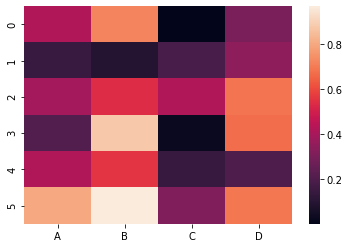

In [38]:
sns.heatmap(df)